# Customer Segmentation Model

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Making use of the synthetic data generated
final_df = pd.read_csv("../../data/processed/banking_behaviour_preference.csv")

## 1 Feature Engineering Rules

#### 1.1 Digital Capability
We will combine the following features to create the `Digital_Capability` score:
- **PhoneService**: 
  - If the customer has phone service (`PhoneService = 1`), add 1 point. 
  - Else, do not award any point.
- **InternetService**: 
  - If the customer has **Fiber optic internet**(`InternetService = 1`) or **DSL** (`InternetService = 0`), add 1 points.
  - If **NO** (`InternetService = 2`), do not award any point.
- **TechSupport**: 
  - If the customer uses tech support (`TechSupport = 2`), add 1 points.
  - If no tech support (`TechSupport = 0` or `TechSupport = 1`), add 0 points.
- **PaperlessBilling**: 
  - If the customer has paperless billing (`PaperlessBilling = 1`), add 1 point
  - Else, do not add any point.
- **PaymentMethod**: 
  - If the customer uses **automatic payments** (`PaymentMethod = 0 or 1`), add 2 points.
  - If **electronic check** (`PaymentMethod = 2`), add 1 point.
  - If **mailed check** (`PaymentMethod = 3`), do not add any point.

**Total score range**: 0 to 6  
- **Digital Capability**: If digital capability score > 2, return True (indicating digitally capable). Otherwise, return False.

---

#### 1.3 Financial Status

We will combine the following features to create the `Financial_Status` score using **percentiles**, except for **Income_Category**, which will use strict rules:

- **Income_Category** (strict rule):
  - Assign points based on income category:
    - If the income is `120+`, add **3 points**.
    - If the income is between `80 - 120`, add **2 points**.
    - If the income is between `60 - 80`, add **1 point**.
    - If income is `Less than 40`, add **0 points**.

- **Credit Score**:
  - Assign points based on the credit score percentile:
    - If the credit score is in the top 20th percentile, add **3 points**.
    - If the credit score is between the 20th and 50th percentile, add **2 points**.
    - If the credit score is between the 50th and 80th percentile, add **1 point**.
    - If below the 80th percentile, add **0 points**.

- **Outstanding Loans**:
  - Assign points based on the loan amount percentile:
    - If the loan amount is in the bottom 20th percentile (e.g., less than $10,000), add **3 points**.
    - If the loan amount is between the 20th and 50th percentile, add **2 points**.
    - If the loan amount is between the 50th and 80th percentile, add **1 point**.
    - If above the 80th percentile, add **0 points**.

- **Balance**:
  - Assign points based on the balance percentile:
    - If the balance is in the top 20th percentile, add **3 points**.
    - If the balance is between the 20th and 50th percentile, add **2 points**.
    - If the balance is between the 50th and 80th percentile, add **1 point**.
    - If below the 80th percentile, add **0 points**.

**Total score range**: 0 to 12 (higher means stronger financial status).

---

#### 1.3 Transaction Behavior
We will create a composite score for `Transaction_Behavior`:
- **Total_Trans_Amt**: 
  - If the total transaction amount is in the top 20%, add **3 points**.
  - If the total transaction amount is in the 20th and 50th percentile, add **2 points**.
  - If the total transaction amount is in the 50th and 80th percentile, add **1 point**.
- **Total_Trans_Count**: 
  - If the total transaction count is in the top 20%, add **3 points**.
  - If the total transaction count is in the 20th and 50th percentile, add **2 points**.
  - If the total transaction count is in the 50th and 80th percentile, add **1 point**.

**Total score range**: 0 to 6 (higher means frequent and high-value transactions).

---

#### 1.4 Product Usage
We will categorize customers based on the number of products they use and assign them a `Product_Usage` label:
- **Heavy User**: Customers using more than 4 products, **award 3 points**
- **Moderate User**: Customers using 3-4 products, **award 2 points**
- **Light User**: Customers using 1-2 or fewer products, **award 1 point**

## 2. Feature Integration: Loyalty and Financial status

#### 2.1. **Loyalty**
Combines `Transaction_Behavious` and `Product_Usage` to measure how engaged the customer is with the bank.
Value ranges from 0-9
#### 2.2. **Financial Status**
Measures the customer’s financial health based on `income`, `credit score`, `outstanding loans`, and `balance`.
Value ranges from 0-12
#### 2.3. **Digital capability**
Captures if the customer is good at techonologies.
  Score based on `PhoneService`, `InternetService`, `TechSupport`, `PaperlessBilling`, and `PaymentMethod`.

## 3. Rule-Based Segmentation Based on Loyalty and Financial status

#### Classification Ranges Based on Percentiles:

##### 3.1. **Loyalty**:
We will categorize customers into **Low**, **Moderate**, and **High** loyalty based on the composite `Loyalty_Score`:
- **Low (L)**: Loyalty score in the **bottom 20%** of the population.
- **Moderate (M)**: Loyalty score between the **20th and 80th percentile**.
- **High (H)**: Loyalty score in the **top 20%** of the population.

##### 3.2. **Financial Status**:
We will categorize customers into **Low**, **Moderate**, and **High** financial status based on the `Financial_Status` score:
- **Low (L)**: Financial status score in the **bottom 20%** of the population.
- **Moderate (M)**: Financial status score between the **20th and 80th percentile**.
- **High (H)**: Financial status score in the **top 20%** of the population.

#### 3.3 **Segments**:

**This part will also discuss possible representatives of each cluster and what their needs might be**

1. **Minimal Engagers**:
   - **Financial status**: Low 
   - **Loyalty**: Low 
   - **Business Insight**: Customers in this segment likely include students, younger individuals just starting out, or elderly customers who aren’t financially active. Focus on retention strategies by promoting entry-level products, such as low-cost savings accounts. Physical outreach may be necessary, especially for those who lack digital capability.

2. **Premier Partners**:
   - **Financial status**: High 
   - **Loyalty**: High 
   - **Business Insight**: These are premium customers, likely professionals or established individuals with a strong engagement in the bank’s products. Priority should be given to offering personalized premium services, loyalty rewards, and investment opportunities. They will appreciate a mix of digital convenience and dedicated relationship management for a high-touch experience.

3. **Affluent Observers**:
   - **Financial status**: High
   - **Loyalty**: Low or Moderate
   - **Business Insight**: These financially capable customers engage selectively, focusing on the most beneficial investment products rather than broad engagement with the bank's offerings. Often busy professionals or high-income earners, they have significant spending potential if attracted to the right opportunities. Increase engagement by offering exclusive perks, premium credit cards, or specialized mortgage products tailored to their selective investment approach. Emphasize digital convenience to make interactions quick and accessible, suiting their busy lifestyles and encouraging them to expand their relationship with the bank.

4. **Loyal Savers**:
   - **Financial status**: Low or Moderate
   - **Loyalty**: High
   - **Business Insight**: These customers are financially modest but loyal users of the bank’s services. Likely middle-income earners or individuals working to improve their credit, they could benefit from value-driven offerings such as cashback credit cards or debt consolidation services. Providing budgeting tools and financial education through digital channels may help improve their financial well-being.

5. **Casual Browsers**:
   - **Financial status**: Moderate or Low
   - **Loyalty**: Moderate or Low
   - **Business Insight**: This segment includes customers who lack strong financial activity or engagement. They could be occasional users, young professionals, or middle-income families. Focus on financial education, bundling products, or targeted campaigns to address their potential needs, such as home loans or long-term savings plans. If they are digitally capable, encourage app-based interactions; otherwise, engage through physical channels.

  
---

**Digital Capability**:
- A binary indicator indicating the digital capability.
- Customers who are digitally capable should be prioritized for online banking services, mobile app usage, and digital communication.
- Non-digitally capable customers may prefer physical channels, like branch visits or mailed offers, so consider traditional methods of outreach.

In [43]:
class CustomerSegmentation:
    def __init__(self, df):
        self.df = df.copy()
        self.percentiles = {}

    def calculate_initial_percentiles(self):
        # Calculate percentiles for features before Loyalty and Financial_Status are created
        self.percentiles['Credit_Score'] = self.df['Credit Score'].quantile([0.2, 0.5, 0.8])
        self.percentiles['Outstanding_Loans'] = self.df['Outstanding Loans'].quantile([0.2, 0.5, 0.8])
        self.percentiles['Balance'] = self.df['Balance'].quantile([0.2, 0.5, 0.8])
        self.percentiles['Total_Trans_Amt'] = self.df['Total_Trans_Amt'].quantile([0.2, 0.5, 0.8])
        self.percentiles['Total_Trans_Count'] = self.df['Total_Trans_Count'].quantile([0.2, 0.5, 0.8])

    def calculate_final_percentiles(self):
        # After Loyalty and Financial_Status have been created, calculate their percentiles
        self.percentiles['Loyalty'] = self.df['Loyalty'].quantile([0.2, 0.8])
        self.percentiles['Financial_Status'] = self.df['Financial_Status'].quantile([0.2, 0.8])

    def digital_capability(self, row):
        score = 0
        score += row['PhoneService']
        score += 1 if row['InternetService'] in [0, 1] else 0
        score += 1 if row['TechSupport'] == 2 else 0
        score += row['PaperlessBilling']
        score += 2 if row['PaymentMethod'] in [0, 1] else 1 if row['PaymentMethod'] == 2 else 0
        return score > 2

    def financial_status(self, row):
        score = 0
        # Income Category (strict rules)
        if row['Income_Category'] == '120 +':
            score += 3
        elif row['Income_Category'] == '80 - 120':
            score += 2
        elif row['Income_Category'] == '60 - 80':
            score += 1

        # Credit Score (percentile-based)
        if row['Credit Score'] > self.percentiles['Credit_Score'][0.8]:
            score += 3
        elif row['Credit Score'] > self.percentiles['Credit_Score'][0.5]:
            score += 2
        elif row['Credit Score'] > self.percentiles['Credit_Score'][0.2]:
            score += 1

        # Outstanding Loans (percentile-based)
        if row['Outstanding Loans'] < self.percentiles['Outstanding_Loans'][0.2]:
            score += 3
        elif row['Outstanding Loans'] < self.percentiles['Outstanding_Loans'][0.5]:
            score += 2
        elif row['Outstanding Loans'] < self.percentiles['Outstanding_Loans'][0.8]:
            score += 1

        # Balance (percentile-based)
        if row['Balance'] > self.percentiles['Balance'][0.8]:
            score += 3
        elif row['Balance'] > self.percentiles['Balance'][0.5]:
            score += 2
        elif row['Balance'] > self.percentiles['Balance'][0.2]:
            score += 1

        return score

    def transaction_behavior(self, row):
        score = 0
        if row['Total_Trans_Amt'] > self.percentiles['Total_Trans_Amt'][0.8]:
            score += 3
        elif row['Total_Trans_Amt'] > self.percentiles['Total_Trans_Amt'][0.5]:
            score += 2
        elif row['Total_Trans_Amt'] > self.percentiles['Total_Trans_Amt'][0.2]:
            score += 1

        if row['Total_Trans_Count'] > self.percentiles['Total_Trans_Count'][0.8]:
            score += 3
        elif row['Total_Trans_Count'] > self.percentiles['Total_Trans_Count'][0.5]:
            score += 2
        elif row['Total_Trans_Count'] > self.percentiles['Total_Trans_Count'][0.2]:
            score += 1

        return score

    def product_usage(self, row):
        if row['No_of_product'] > 4:
            return 3
        elif 3 <= row['No_of_product'] <= 4:
            return 2
        return 1

    def loyalty_score(self, row):
        return self.transaction_behavior(row) + self.product_usage(row)

    def assign_loyalty_level(self, loyalty_score):
        if loyalty_score > self.percentiles['Loyalty'][0.8]:
            return 'High'
        elif loyalty_score > self.percentiles['Loyalty'][0.2]:
            return 'Moderate'
        else:
            return 'Low'

    def assign_financial_status_level(self, financial_status_score):
        if financial_status_score > self.percentiles['Financial_Status'][0.8]:
            return 'High'
        elif financial_status_score > self.percentiles['Financial_Status'][0.2]:
            return 'Moderate'
        else:
            return 'Low'

    def assign_segment(self, row):
        # Assign loyalty and financial status levels
        loyalty_label = self.assign_loyalty_level(row['Loyalty'])
        financial_status_label = self.assign_financial_status_level(row['Financial_Status'])

        # Return segment based on the classification of loyalty and financial status
        if financial_status_label == 'Low' and loyalty_label == 'Low':
            return 'Minimal Engagers'
        elif financial_status_label == 'High' and loyalty_label == 'High':
            return 'Premier Partners'
        elif financial_status_label == 'High' and loyalty_label in ['Moderate', 'Low']:
            return 'Affluent Observers'
        elif financial_status_label in ['Moderate', 'Low'] and loyalty_label == 'High':
            return 'Loyal Savers'
        else:
            return 'Casual Browsers'

    def perform_segmentation(self):
        # Calculate percentiles for features before Loyalty and Financial Status
        self.calculate_initial_percentiles()

        self.df['Digital_Capability'] = self.df.apply(self.digital_capability, axis=1)
        self.df['Financial_Status'] = self.df.apply(self.financial_status, axis=1)
        self.df['Loyalty'] = self.df.apply(self.loyalty_score, axis=1)

        # After Loyalty and Financial_Status are created, calculate their percentiles
        self.calculate_final_percentiles()

        # Assign segment based on loyalty and financial status
        self.df['Segment'] = self.df.apply(self.assign_segment, axis=1)

        return self.df[['CLIENTNUM','Loyalty','Financial_Status','Segment', 'Digital_Capability']]

    def predict(self, new_data):
        # Apply segmentation logic to new data
        new_data['Digital_Capability'] = new_data.apply(self.digital_capability, axis=1)
        new_data['Financial_Status'] = new_data.apply(self.financial_status, axis=1)
        new_data['Loyalty'] = new_data.apply(self.loyalty_score, axis=1)

        # Calculate percentiles for Loyalty and Financial Status based on new data
        self.calculate_final_percentiles()

        new_data['Segment'] = new_data.apply(self.assign_segment, axis=1)
        return new_data[['CLIENTNUM','Loyalty','Financial_Status','Segment', 'Digital_Capability']]

## 4. Running the model

In [44]:
# Initialize and test with final_df
segmentation_test = CustomerSegmentation(final_df)
segmentation_result = segmentation_test.perform_segmentation()

# Output first few rows and value counts for segmentation
print(segmentation_result.head())
print(segmentation_result['Segment'].value_counts())

   CLIENTNUM  Loyalty  Financial_Status           Segment  Digital_Capability
0  768805383        3                 5   Casual Browsers                True
1  818770008        3                 5   Casual Browsers                True
2  713982108        2                 3  Minimal Engagers                True
3  709106358        3                 2  Minimal Engagers                True
4  713061558        2                 5   Casual Browsers                True
Segment
Casual Browsers       83840
Affluent Observers    14244
Minimal Engagers       7576
Loyal Savers           3876
Premier Partners        588
Name: count, dtype: int64


Plotting a pie chart for visualisation

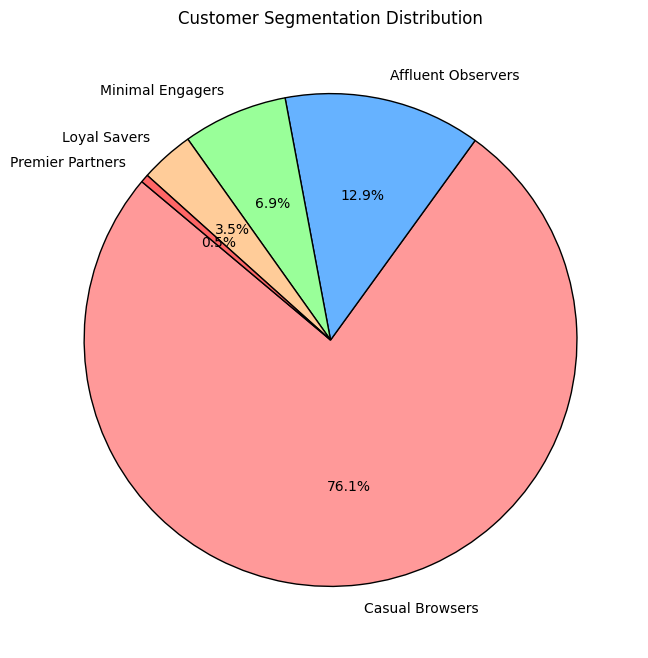

In [51]:
# Define the data for the segments
segment_counts = {
    "Casual Browsers": 83840,
    "Affluent Observers": 14244,
    "Minimal Engagers": 7576,
    "Loyal Savers": 3876,
    "Premier Partners": 588
}

# Extract labels and values for the pie chart
labels = list(segment_counts.keys())
sizes = list(segment_counts.values())

# Define colors for each segment (optional)
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title("Customer Segmentation Distribution")

# Display the pie chart
plt.show()

# 5. Other consideration

We will do some recoding of the segment so that the result can be used more easily by other models from our project.

1. **Minimal Engagers** = 1
  
2. **Casual Browsers** = 2

3. **Loyal Savers** = 3

4. **Affluent Observers** = 4
   
5. **Premier Partners** = 5

In [31]:
# Define the mapping for the segments
segment_mapping = {
    "Minimal Engagers": 1,
    "Casual Browsers": 2,
    "Loyal Savers": 3,
    "Affluent Observers": 4,
    "Premier Partners": 5
}

# Apply the mapping to the SEGMENT column in segmentation_result using .loc
segmentation_result.loc[:, 'Segment'] = segmentation_result['Segment'].map(segment_mapping)

# Display the updated segmentation_result DataFrame
print(segmentation_result['Segment'].value_counts())

Segment
2    83840
4    14244
1     7576
3     3876
5      588
Name: count, dtype: int64


In [32]:
# saving the result
segmentation_result.to_csv("../../data/processed/segmentation_result_static.csv", index = False)